In [36]:
from __future__ import print_function, division
#from https://dev.socrata.com/foundry/data.cityofnewyork.us/m46j-75iy
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
import statsmodels.api as sm
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

import zipfile

#from https://dev.socrata.com/foundry/data.cityofnewyork.us/m46j-75iy
#allows to works in python 2 or 3 with the module urllib2 or urllib to read the Json File
try:
    # Python 3
    from urllib.request import urlopen, Request
except ImportError:
    # Fallback for Python 2
    from urllib2 import urlopen
%matplotlib inline

In [2]:
#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

In [3]:
query = ("https://data.cityofnewyork.us/resource/m46j-75iy.json")
raw_data = pd.read_json(query)

In [4]:
nrg = raw_data

In [5]:
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,N/A,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,#N/A,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,N/A,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [6]:
! curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"
zip_ref = zipfile.ZipFile('mn_mappluto_16v1.zip','r')
zip_ref.extractall('Manhattan')
zip_ref.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  63.6M      0 --:--:-- --:--:-- --:--:-- 65.5M


In [7]:
file_path = os.getenv('PUIDATA') + '/' + 'Manhattan'+ '/'+'MNMapPLUTO.shp'
bsize = gp.read_file(file_path)
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [8]:
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [9]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [10]:
bsize_clean = bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot', u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',   u'UnitsRes',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode', u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis = 1)

In [11]:
bsize_clean.head()

,BBL,UnitsTotal
0,1.015450e+09,18
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,32
4,1.011970e+09,26


In [12]:
nrg_clean = nrg.drop([u'automatic_water_benchmarking_eligible',
       u'borough','bbls_co_reported' ,u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method', 
          u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2'], axis = 1)
nrg_clean.head()

,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,nyc_borough_block_and_lot_bbl,site_eui_kbtu_ft2,zip_code
0,NaN,NaN,1.000410e+09,NaN,NaN
1,1.0,82730.0,4.021460e+09,NaN,11375.0
2,NaN,NaN,2.027620e+09,NaN,NaN
3,1.0,440360.0,1.006700e+09,NaN,10001.0
4,NaN,NaN,2.048300e+09,NaN,NaN


In [13]:
nrg_clean.columns = ['Number_Buld','DOF_ft2','BBL','Site_EUI_(kBtu/ft2)','ZipCode']

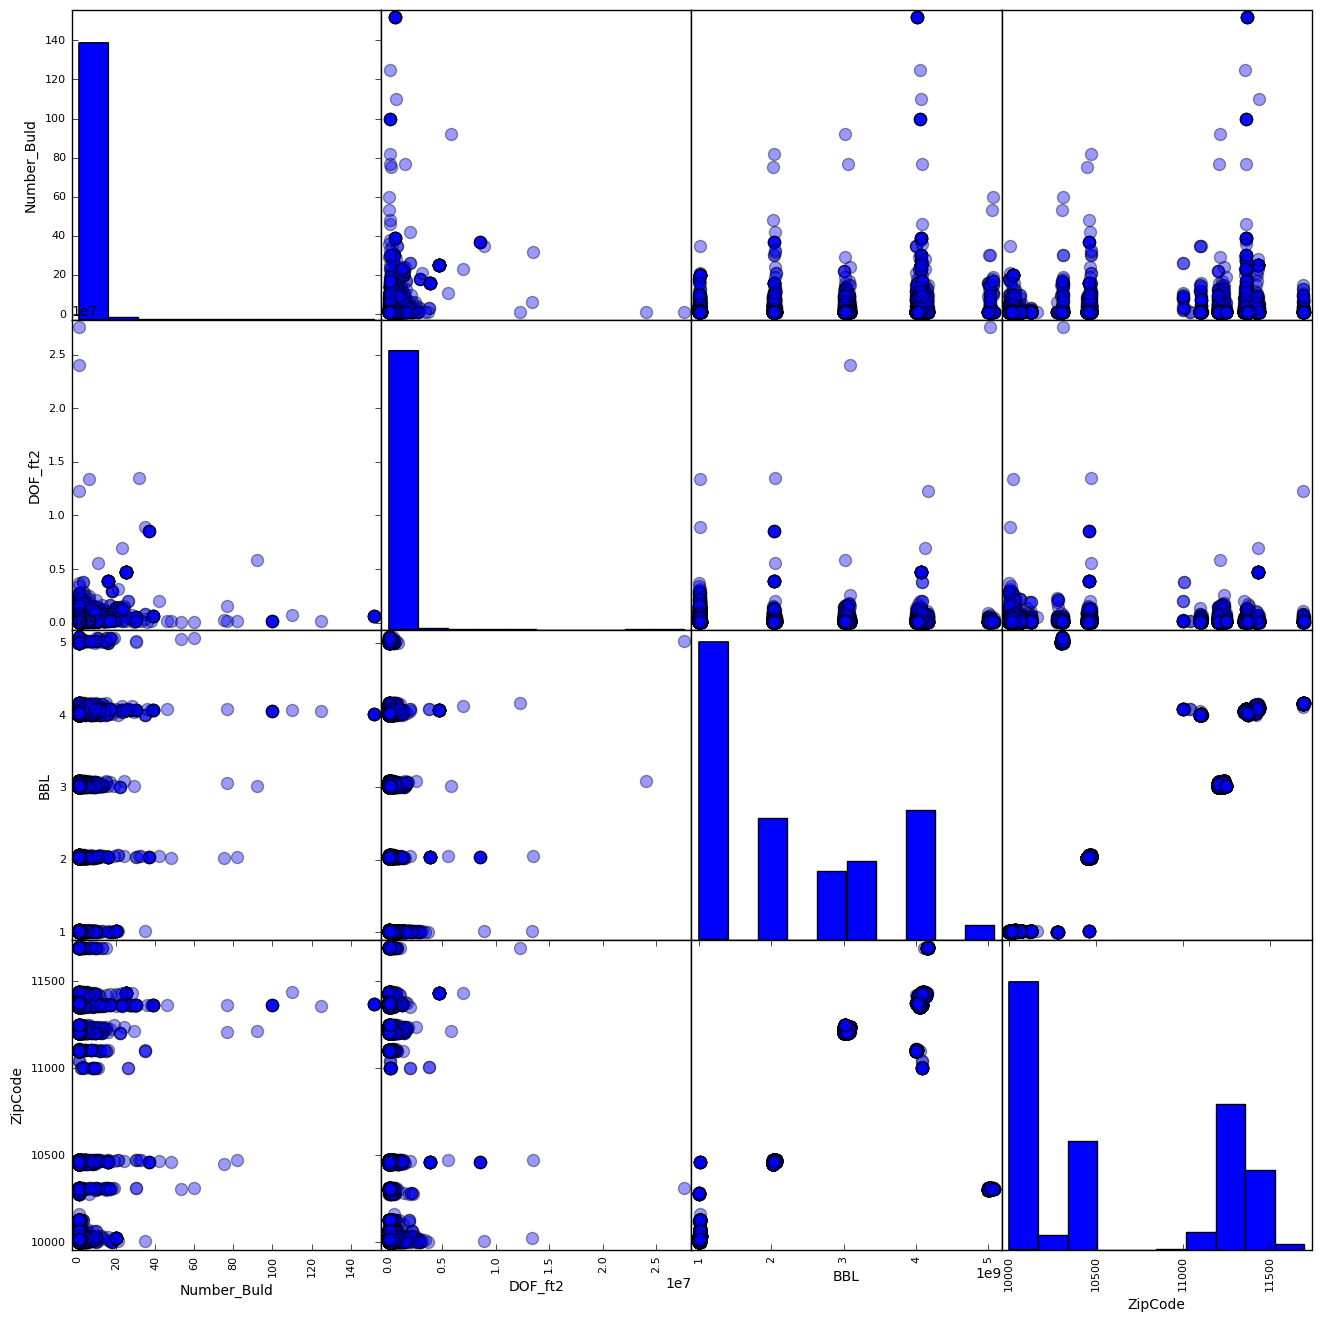

In [14]:
from pandas.tools.plotting import scatter_matrix
ax= scatter_matrix (nrg_clean, alpha=0.4, s=300, figsize=(16, 16))

**Figure 1: scatter matrix of all numerical values in the files.**

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them. Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into. This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..." However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [15]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False





Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest.

I can replace the entries that failed to be converted to 'NaN' (because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx)


In [16]:
indx = (np.vectorize(canconvert)(nrg_clean['Site_EUI_(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg_clean['Site_EUI_(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
indx = (np.vectorize(canconvert)(nrg_clean['Number_Buld']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg_clean['Number_Buld'][~indx] = float('NaN')

invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
indx = (np.vectorize(canconvert)(nrg_clean['DOF_ft2']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg_clean['DOF_ft2'][~indx] = float('NaN')

invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
##check that your conversion worked: e.g.
print (nrg_clean['Site_EUI_(kBtu/ft2)'].astype(float).head())
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize.BBL.astype(float).head()
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Site_EUI_(kBtu/ft2), dtype: float64


0    1.015450e+09
1    1.007238e+09
2    1.016800e+09
3    1.013850e+09
4    1.011970e+09
Name: BBL, dtype: float64

In [20]:
nrg_clean['Site_EUI_(kBtu/ft2)'] = pd.to_numeric(nrg_clean['Site_EUI_(kBtu/ft2)'], errors='raise')

## MERGE THE DATASET 

TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)


In [21]:
bblnrgdata = pd.merge(bsize_clean,nrg_clean, how = 'outer' ,on = ['BBL'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f756a7fde10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f752f73e750>]], dtype=object)

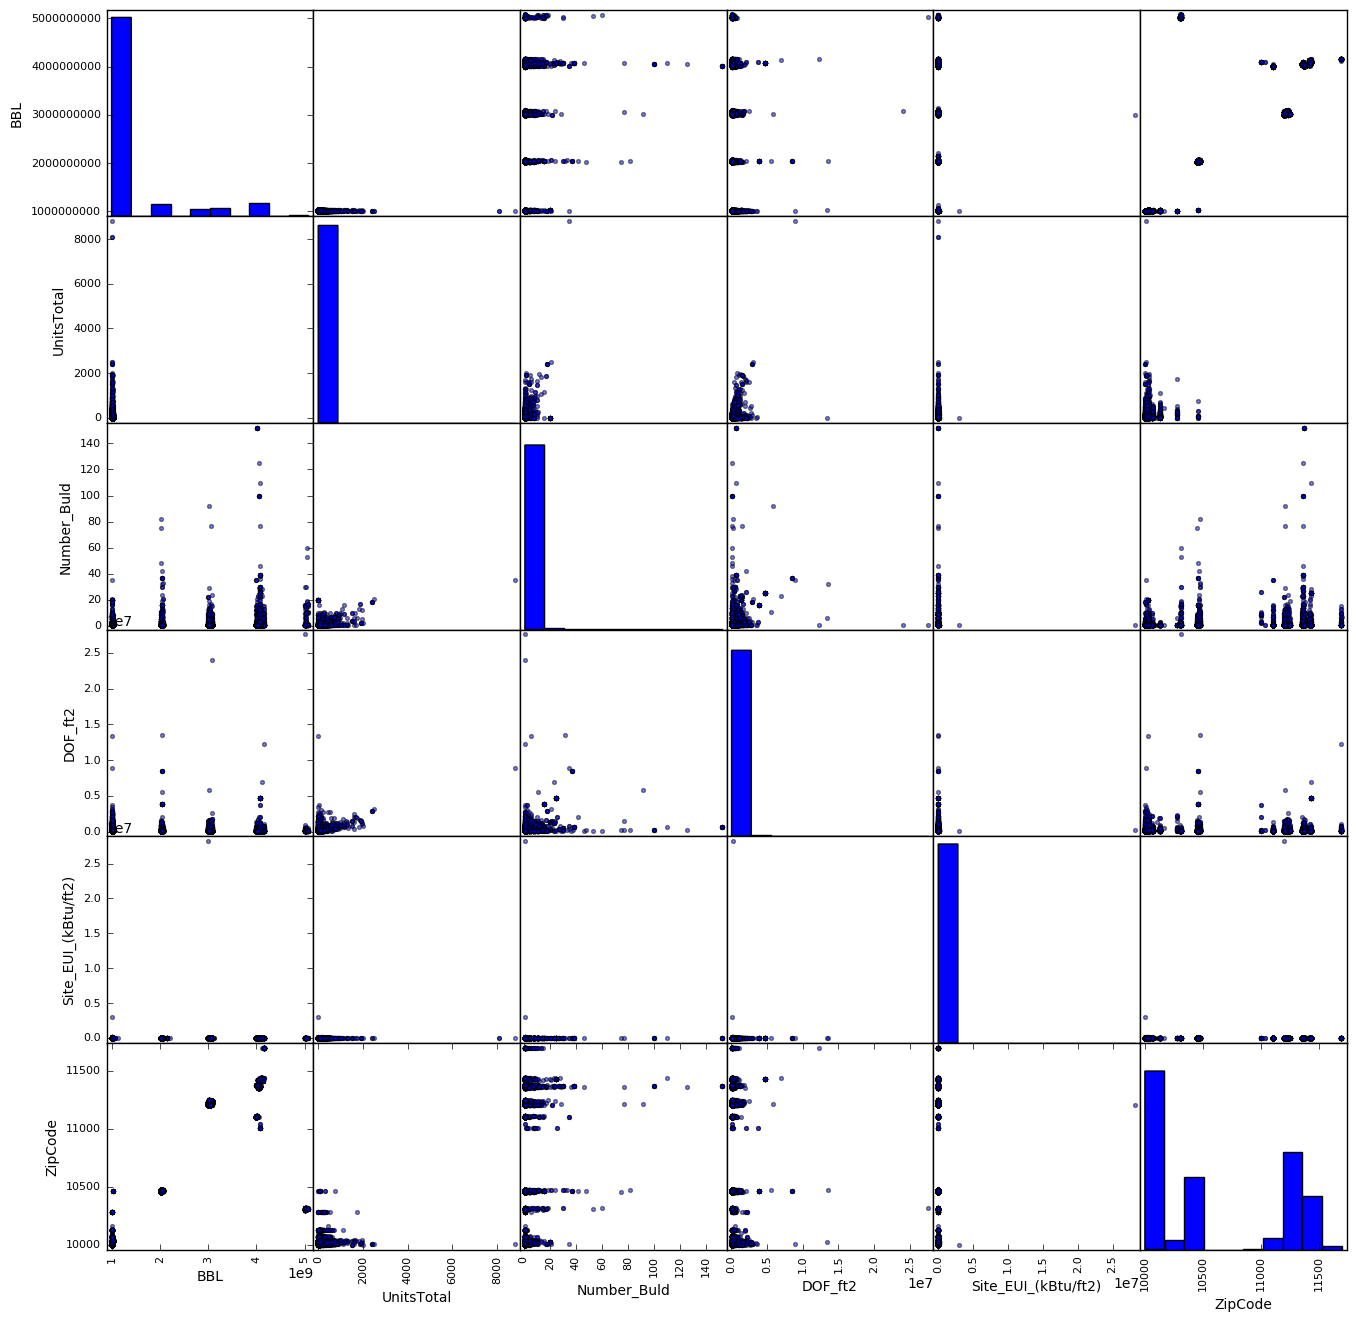

In [22]:
# Now the scatter matrix plot should show more columns.
scatter_matrix (bblnrgdata, s=30, figsize=(16,16))

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: Energy TOTAL, not per sq ft... Here you can choose what you think makes more sense for the number of units: all units, residential units...

Make a scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. 

Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. Remember, each plot needs a descriptive caption, and axis labels


In [23]:
# first scatter plot

In [24]:
bblnrgdata.columns

Index([                u'BBL',          u'UnitsTotal',         u'Number_Buld',
                   u'DOF_ft2', u'Site_EUI_(kBtu/ft2)',             u'ZipCode'],
      dtype='object')

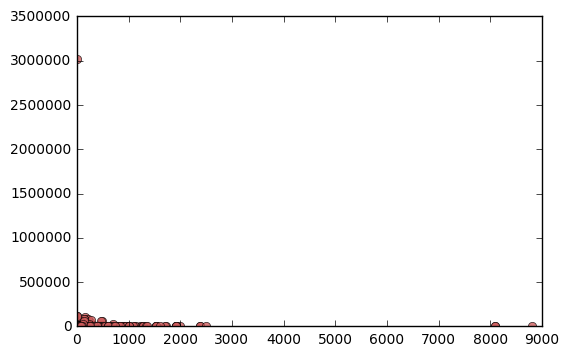

In [25]:
fig =plt.figure()
ax = plt.plot (bblnrgdata.UnitsTotal,bblnrgdata['Site_EUI_(kBtu/ft2)'], 'o', color = 'Indianred', alpha = 0.8)

#arreglar grafico

In [26]:
## CAPTION

In [27]:
# zoomed in scatter plot

## CAPTION

when the points in a plot all look scrunched against the axis

Try to make a log plot instead. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.


In [28]:
bblnrgdata_cut = bblnrgdata[bblnrgdata>1000]
bblnrgdata_cut

,BBL,UnitsTotal,Number_Buld,DOF_ft2,Site_EUI_(kBtu/ft2),ZipCode
0,1.015450e+09,NaN,NaN,NaN,NaN,NaN
1,1.007238e+09,NaN,NaN,97563.0,NaN,10001.0
2,1.016800e+09,NaN,NaN,NaN,NaN,NaN
3,1.013850e+09,NaN,NaN,203490.0,NaN,10021.0
4,1.011970e+09,NaN,NaN,NaN,NaN,NaN
5,1.002360e+09,NaN,NaN,NaN,NaN,NaN
6,1.008370e+09,NaN,NaN,NaN,NaN,NaN
7,1.001960e+09,NaN,NaN,NaN,NaN,NaN
8,1.022240e+09,NaN,NaN,NaN,NaN,NaN
9,1.011270e+09,NaN,NaN,NaN,NaN,NaN


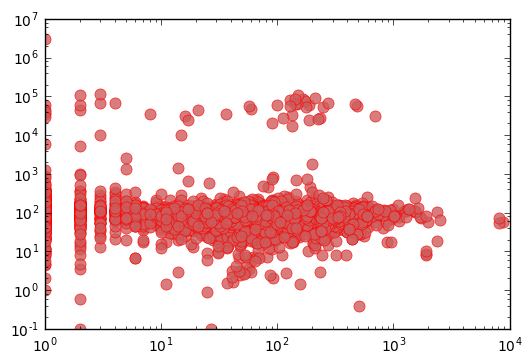

In [29]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax = plt.plot(bblnrgdata.UnitsTotal,bblnrgdata['Site_EUI_(kBtu/ft2)'],
               'o', alpha = 0.8, markersize=8, markerfacecolor= 'Indianred', markeredgecolor= 'red')
#no use el correcto pero si lo uso, es q no sale.

#mirar al fonde del notebook

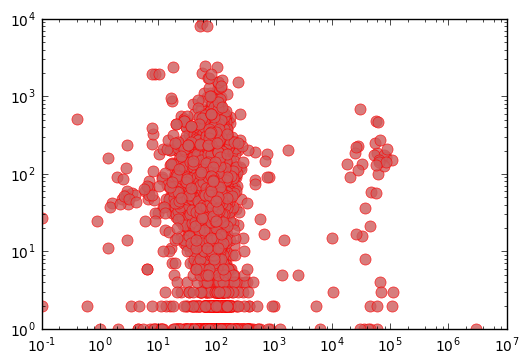

In [30]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax = plt.plot(bblnrgdata['Site_EUI_(kBtu/ft2)'],bblnrgdata.UnitsTotal,
               'o', alpha = 0.8, markersize=8, markerfacecolor= 'Indianred', markeredgecolor= 'red')

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves: 

if you used statsmodels it would look something like this:


In [ ]:
x = bblnrgdata['Site_EUI_(kBtu/ft2)']
y = bblnrgdata.UnitsTotal

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

In [ ]:
y = bblnrgdata['Site_EUI_(kBtu/ft2)']
x = bblnrgdata.UnitsTotal

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN